In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings  
warnings.filterwarnings('ignore')
plt.rcParams["font.sans-serif"]=['SimHei']#用来正常显示中文标签  
plt.rcParams["axes.unicode_minus"]=False#用来正常显示负号  

In [15]:
data=pd.read_csv('WorldIndex.csv')

In [16]:
data

,Country,Continent,Life_expectancy,GDP_per_capita,Population
0,Algeria,Africa,75.042537,4132.760292,39871528.0
1,Angola,Africa,52.666098,3695.793748,27859305.0
2,Benin,Africa,59.720707,783.947091,10575952.0
3,Botswana,Africa,64.487415,6532.060501,2209197.0
4,Burundi,Africa,57.107049,303.681022,10199270.0
...,...,...,...,...,...
172,Paraguay,South America,73.025634,4109.367724,6639119.0
173,Peru,South America,74.780732,6030.343259,31376671.0
174,Suriname,South America,71.294171,8818.982566,553208.0
175,Uruguay,South America,77.138220,15524.842470,3431552.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 5 columns):
Country            177 non-null object
Continent          177 non-null object
Life_expectancy    169 non-null float64
GDP_per_capita     169 non-null float64
Population         176 non-null float64
dtypes: float64(3), object(2)
memory usage: 7.0+ KB


### 去除空值

In [18]:
pd.DataFrame(data.isnull().sum())

,0
Country,0
Continent,0
Life_expectancy,8
GDP_per_capita,8
Population,1


In [19]:
data_new = data.dropna()
pd.DataFrame(data_new.isnull().sum())

,0
Country,0
Continent,0
Life_expectancy,0
GDP_per_capita,0
Population,0


### 人均寿命数据的直方图

Text(0, 0.5, '人数')

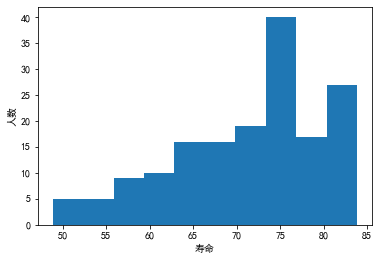

In [20]:

plt.hist(data_new.Life_expectancy)
plt.xlabel('寿命')
plt.ylabel('人数')

### 人均GDP直方图

Text(0, 0.5, '人数')

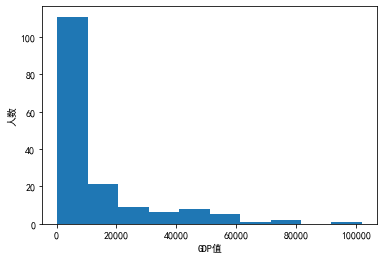

In [21]:
plt.hist(data_new.GDP_per_capita)
plt.xlabel('GDP值')
plt.ylabel('人数')

### 人均寿命箱线图

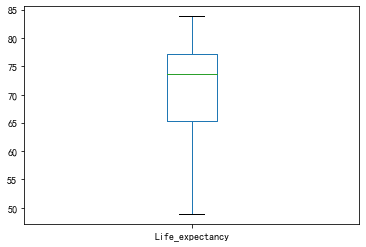

In [57]:
data_new.Life_expectancy.plot.box()

[Text(0, 0, '人均寿命')]

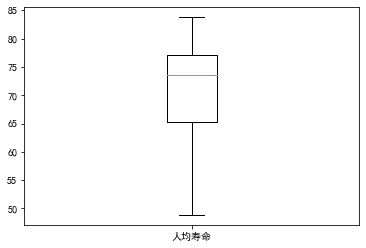

In [56]:
fig, ax = plt.subplots()
ax.boxplot(data_new.Life_expectancy)#, labels=['人均寿命箱线图']
ax.set_xticklabels(["人均寿命"])

### 绘制每个大洲的国家个数条形图

In [14]:
continent=data_new.groupby('Continent').Country.count()

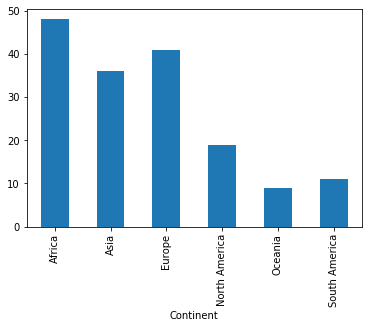

In [15]:
continent.plot(kind='bar')

### 绘制各大洲国家数量占比的饼图

In [36]:
continent.index

Index(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'],
      dtype='object', name='Continent')

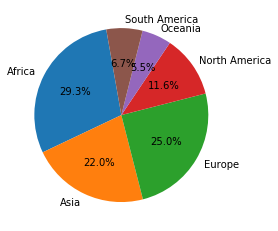

In [37]:
plt.pie(continent,labels=continent.index,autopct='%1.1f%%',shadow=False,startangle=100)#labels=labels
plt.show()

### 绘制人均寿命和人均GDP的关系（散点）

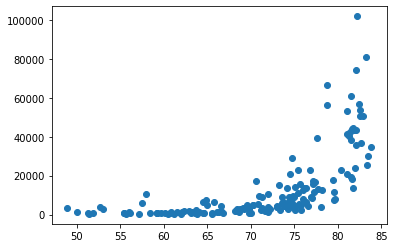

In [35]:
x=data_new.Life_expectancy
y=data_new.GDP_per_capita#与random.randint表示含义不同
plt.scatter(x,y)
plt.show()

### 人均GDP与人均寿命的气泡图（数据点大小，正比于人口数，给不同洲的国家设置不同颜色）

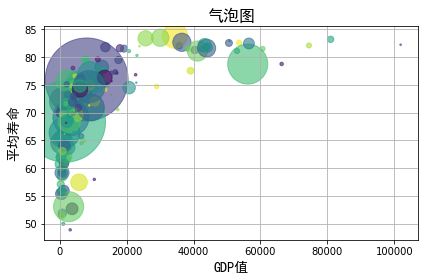

In [9]:
fig, ax = plt.subplots()
#color = list(data_new.Country)
color = np.random.rand(len(list(data_new.Country)))
#分别设置X轴值，Y轴值，以及第三个参数值大小来显示气泡大小
ax.scatter(data_new.GDP_per_capita,data_new.Life_expectancy,s = list(data_new.Population/200000),c=color,alpha=0.6)
#ax.plot(10*np.random.randn(100),10*np.random.randn(100),"o")
ax.set_title("气泡图",fontproperties = "simHei",fontsize = 16)
ax.set_xlabel("GDP值",fontproperties = "simHei",fontsize = 14)
ax.set_ylabel("平均寿命",fontproperties = "simHei",fontsize = 14)
ax.grid(True)
fig.tight_layout()
plt.show()

### ①	求解f(x)=2*sin(x)-x+1

sol1_root:     fjac: array([[-1.]])
     fun: array([0.31514905])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 24
     qtf: array([-0.31514905])
       r: array([0.00451924])
  status: 5
 success: False
       x: array([-1.04882813])
sol1_root.x [-1.04882813]
sol1_fsolve: [-1.04882813]
----------------


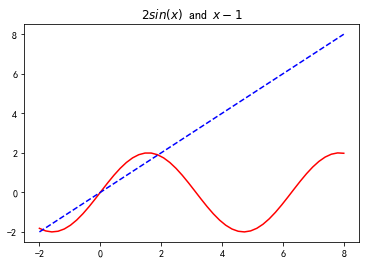

In [22]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root,fsolve

rangex1 = np.linspace(-2,8)
rangey1_1,rangey1_2 = 2*np.sin(rangex1),rangex1
plt.figure(1)
plt.plot(rangex1,rangey1_1,'r',rangex1,rangey1_2,'b--')
plt.title('$2sin(x)$ and $x-1$')

f1=lambda x:np.sin(x)*2-x+1
sol1_root = root(f1,[0])
print('sol1_root:',sol1_root)
print('sol1_root.x',sol1_root.x)
sol1_fsolve = fsolve(f1,[0])
print('sol1_fsolve:',sol1_fsolve)
print('----------------')

### ②	求解线性方程组{3X1+2X2=3;X1-2X2=5}

In [1]:
import numpy as np
A=np.mat('3,2;1,-2')
B=np.mat('3,5').T
R=np.linalg.solve(A,B)
print(R)

[[ 2. ]
 [-1.5]]


In [5]:
from sympy import *
x1 = Symbol('x1')
x2 = Symbol('x2')
print (solve([3 * x1 + 2*x2 - 3, x1 - 2*x2-5],[x1, x2]))

{x1: 2, x2: -3/2}
